In [1]:
import pandas as pd
dataset = pd.read_csv('processed.cleveland.data')
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


# Heart Disease Databases

## Relevant Information
This database contains 76 attributes, but all published experiments
refer to using a subset of 14 of them.  In particular, the Cleveland
database is the only one that has been used by ML researchers to
this date.  The "goal" field refers to the presence of heart disease
in the patient.  It is integer valued from 0 (no presence) to 4.
Experiments with the Cleveland database have concentrated on simply
attempting to distinguish presence (values 1,2,3,4) from absence (value
0).

## Attribute Information

| Column | Description |
|:------:|:------------|
| age | age in years |
| sex | sex (1 = male; 0 = female) |
| cp | chest pain type (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic) |
| trestbps | resting blood pressure (in mm Hg on admission to the hospital) |
| chol | serum cholestoral in mg/dl |
| fbs | (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false) |
| restecg | resting electrocardiographic results (Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria) |
| thalach | maximum heart rate achieved |
| exang | exercise induced angina (1 = yes; 0 = no) |
| oldpeak | ST depression induced by exercise relative to rest |
| slope | the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping) |
| ca | number of major vessels (0-3) colored by flourosopy |
| num | diagnosis of heart disease |

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [4]:
from sklearn.impute import SimpleImputer

y = np.where(dataset.loc[:, 'num'].values > 0, True, False)
X = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(
    dataset.iloc[:, :-1].replace('?', np.nan).astype('float64').values
)

In the following section we are creating the `train_set` and `test_set` from the given dataset.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


- Euclidean
- Manhatan: $\sum_{i=0}^n |x_i - y_i|$
- Chebyshev: $max_{i=0}^n |x_i - y_i|$

In [6]:
from knn import KNN

for distance in ['euclidean', 'manhattan', 'chebyshev']:
    print(distance)
    for k in [*range(1, 8), 10, 15]:
        clf = KNN(k=k, distance=distance)
        clf.fit(X_train, y_train)
        # false positive
        fp = 0
        # false negative
        fn = 0
        # true positive
        tp = 0
        # true negative
        tn = 0
        for predicted, actual in zip(clf.predict(X_test), y_test):
            if actual == True and predicted == True:
                tp += 1
            if actual == True and predicted == False:
                fn += 1
            if actual == False and predicted == True:
                fp += 1
            if actual == False and predicted == False:
                tn += 1

        print(f'{f"k = {k}":-^20}\n')
        print(f'{tp:>2} | {fp:>2}')
        print(f'{"":-^7}')
        print(f'{fn:>2} | {tn:>2}')

        total = fp + fn + tp + tn
        accuracy = (tp + tn) / total
        print(f'accuracy: {accuracy}\n')

euclidean
-------k = 1--------

23 | 20
-------
26 | 31
accuracy: 0.54

-------k = 2--------

19 | 11
-------
30 | 40
accuracy: 0.59

-------k = 3--------

30 | 19
-------
19 | 32
accuracy: 0.62

-------k = 4--------

18 | 10
-------
31 | 41
accuracy: 0.59

-------k = 5--------

32 | 15
-------
17 | 36
accuracy: 0.68

-------k = 6--------

25 | 11
-------
24 | 40
accuracy: 0.65

-------k = 7--------

32 | 17
-------
17 | 34
accuracy: 0.66

-------k = 10-------

27 | 13
-------
22 | 38
accuracy: 0.65

-------k = 15-------

29 | 16
-------
20 | 35
accuracy: 0.64

manhattan
-------k = 1--------

26 | 14
-------
23 | 37
accuracy: 0.63

-------k = 2--------

20 |  9
-------
29 | 42
accuracy: 0.62

-------k = 3--------

33 | 14
-------
16 | 37
accuracy: 0.7

-------k = 4--------

22 |  9
-------
27 | 42
accuracy: 0.64

-------k = 5--------

32 | 15
-------
17 | 36
accuracy: 0.68

-------k = 6--------

28 | 10
-------
21 | 41
accuracy: 0.69

-------k = 7--------

31 | 15
-------
18 | 36
accur

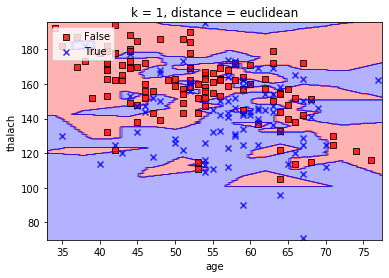

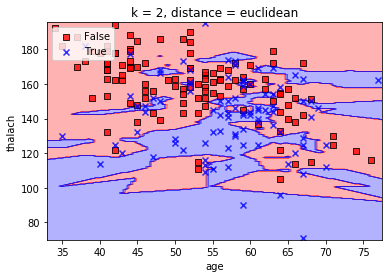

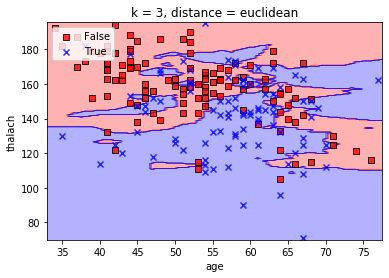

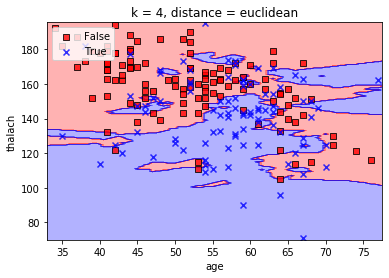

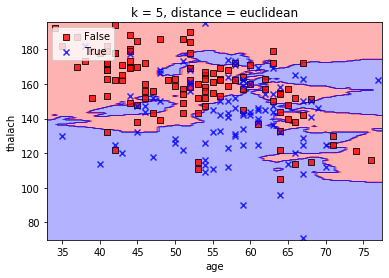

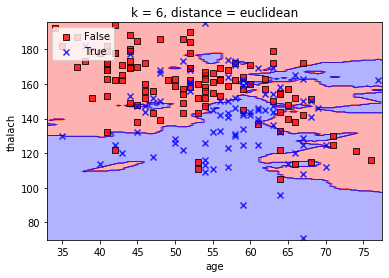

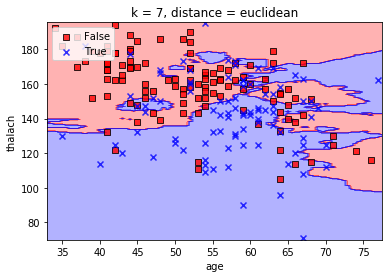

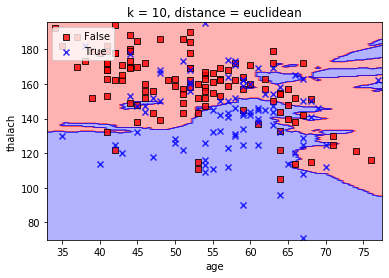

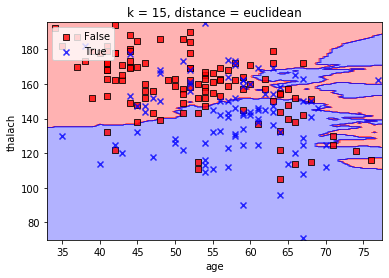

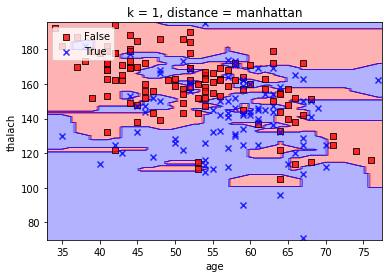

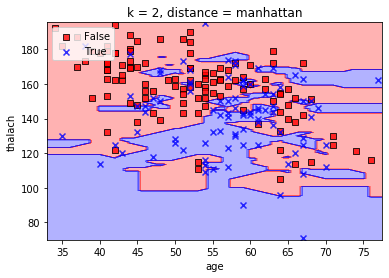

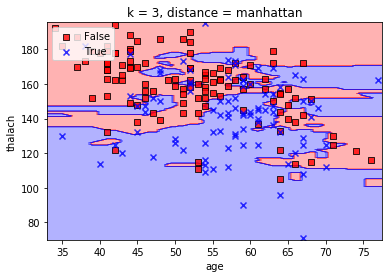

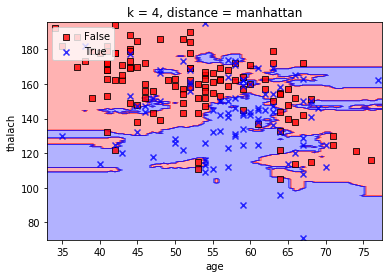

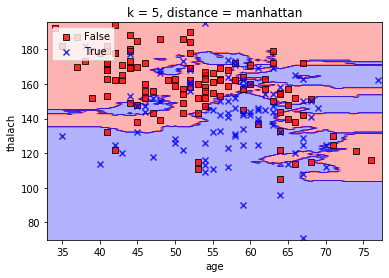

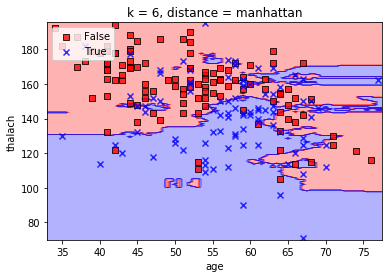

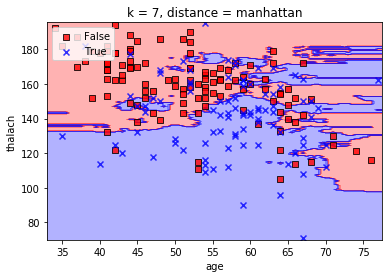

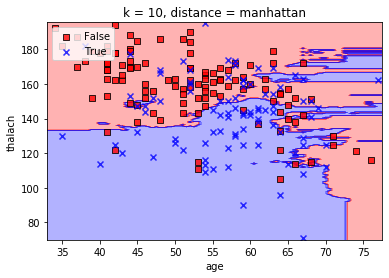

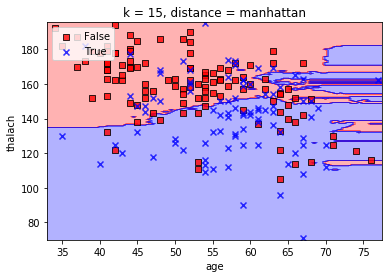

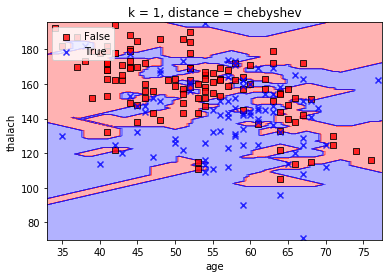

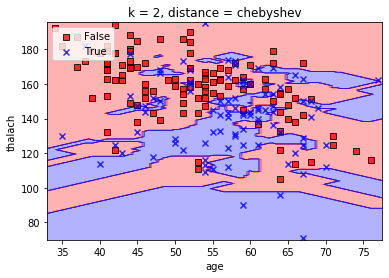

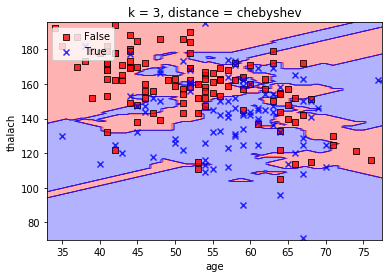

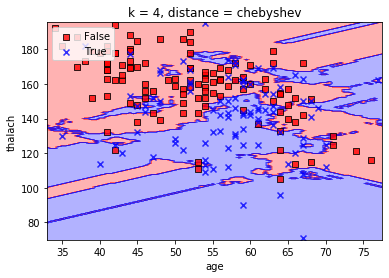

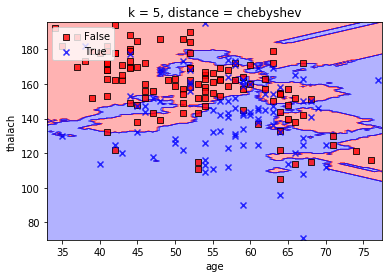

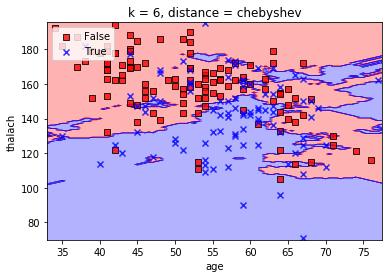

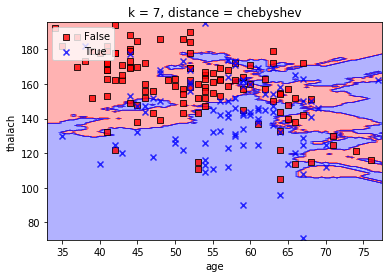

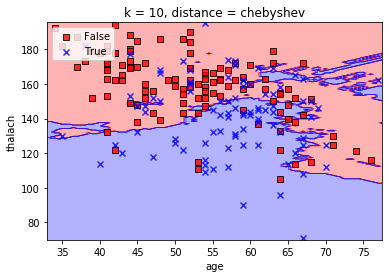

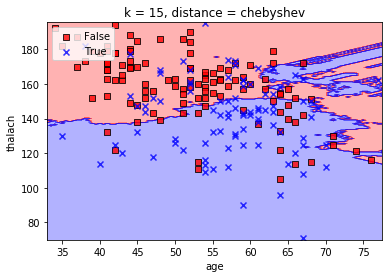

In [7]:
from helper import plot_decision_regions

for distance in ['euclidean', 'manhattan', 'chebyshev']:
    for k in [*range(1, 8), 10, 15]:
        plot_decision_regions(X_train[:, [0,7]], y_train, KNN(k=k, distance=distance).fit(X_train[:, [0,7]], y_train), resolution=0.5)
        plt.title(f'k = {k}, distance = {distance}')
        plt.xlabel('age')
        plt.ylabel('thalach')
        plt.legend(loc="upper left")
        plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler().fit(X_train)
X_std_train = std.transform(X_train)
X_std_test = std.transform(X_test)

In [10]:
from knn import KNN

for distance in ['euclidean', 'manhattan', 'chebyshev']:
    print(distance)
    for k in [*range(1, 8), 10, 15]:
        clf = KNN(k=k, distance=distance)
        clf.fit(X_std_train, y_train)
        # false positive
        fp = 0
        # false negative
        fn = 0
        # true positive
        tp = 0
        # true negative
        tn = 0
        for predicted, actual in zip(clf.predict(X_std_test), y_test):
            if actual == True and predicted == True:
                tp += 1
            if actual == True and predicted == False:
                fn += 1
            if actual == False and predicted == True:
                fp += 1
            if actual == False and predicted == False:
                tn += 1

        print(f'{f"k = {k}":-^20}\n')
        print(f'{tp:>2} | {fp:>2}')
        print(f'{"":-^7}')
        print(f'{fn:>2} | {tn:>2}')

        total = fp + fn + tp + tn
        accuracy = (tp + tn) / total
        print(f'accuracy: {accuracy}\n')

euclidean
-------k = 1--------

38 |  9
-------
11 | 42
accuracy: 0.8

-------k = 2--------

33 |  4
-------
16 | 47
accuracy: 0.8

-------k = 3--------

42 |  9
-------
 7 | 42
accuracy: 0.84

-------k = 4--------

40 |  6
-------
 9 | 45
accuracy: 0.85

-------k = 5--------

40 | 11
-------
 9 | 40
accuracy: 0.8

-------k = 6--------

38 |  8
-------
11 | 43
accuracy: 0.81

-------k = 7--------

41 |  8
-------
 8 | 43
accuracy: 0.84

-------k = 10-------

39 |  7
-------
10 | 44
accuracy: 0.83

-------k = 15-------

42 |  8
-------
 7 | 43
accuracy: 0.85

manhattan
-------k = 1--------

38 | 11
-------
11 | 40
accuracy: 0.78

-------k = 2--------

33 |  4
-------
16 | 47
accuracy: 0.8

-------k = 3--------

43 |  7
-------
 6 | 44
accuracy: 0.87

-------k = 4--------

36 |  4
-------
13 | 47
accuracy: 0.83

-------k = 5--------

41 |  6
-------
 8 | 45
accuracy: 0.86

-------k = 6--------

37 |  4
-------
12 | 47
accuracy: 0.84

-------k = 7--------

39 |  7
-------
10 | 44
accuracy